<a href="https://colab.research.google.com/github/Xotik105/outlier_info/blob/main/Outlier_packages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 3.2 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=7737b6573f7a5be70ece7cf7898a5bf930b08cc03171bcc3f7c9c22b88fda48c
  Stored in directory: /root/.cache/pip/wheels/3d/48/a8/87d61660791c7e6b0f5c3068da7fb17ade7fdc041e864fe053
Successfully built pyod


In [2]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


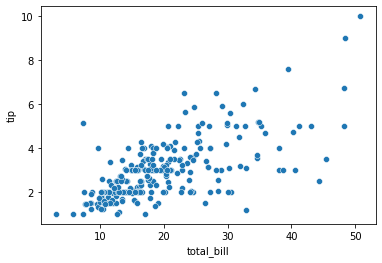

In [4]:
sns.scatterplot(data = df, x= 'total_bill',y = 'tip')

In [5]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

In [8]:
abod_clf = ABOD(contamination=0.05)
abod_clf.fit(df[['total_bill', 'tip']])

ABOD(contamination=0.05, method='fast', n_neighbors=5)

In [10]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=42)
cblof_clf.fit(df[['total_bill', 'tip']])
df['ABOD_Clf'] = abod_clf.labels_
df['CBLOF_Clf'] = cblof_clf.labels_

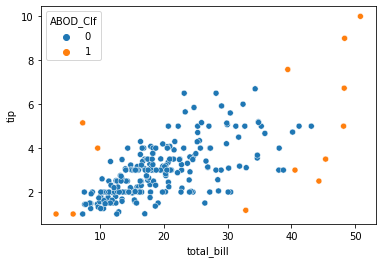

In [11]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'ABOD_Clf')

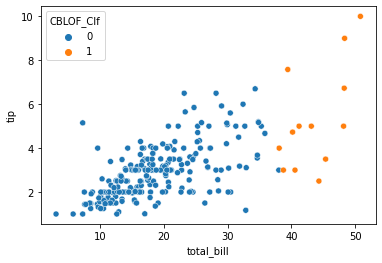

In [12]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'CBLOF_Clf')

In [13]:
!pip install alibi_detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.0 MB/s 
     |████████████████████████████████| 3.3 MB 64.6 MB/s 
     |████████████████████████████████| 4.7 MB 37.7 MB/s 
     |████████████████████████████████| 34.5 MB 15 kB/s 
     |████████████████████████████████| 101 kB 10.7 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
     |████████████████████████████████| 6.6 MB 38.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.0
    Uninstalling llvmlite-0.39.0:
      Successfully uninstalled llvmlite-0.39.0
  Attempting uninstall: numba
    Found existing installation: numba 0.56.0
    Uninstalling numba-0.56.0:
      Successfully uninstalled numba-0.56.0


In [14]:
from alibi_detect.od import IForest
od = IForest(
    threshold=0.,
    n_estimators=100
)

In [15]:
od.fit(df[['total_bill', 'tip']])